# Requests: HTTP for Humans™

https://requests.readthedocs.io/en/master/

Requests is an elegant and simple HTTP library for Python, built for human begins

Requests allows you to send HTTP/1.1 requests extremely easily. There’s no need to manually add query strings to your URLs, or to form-encode your POST data.

First, make sure that Requests is installed.

In [1]:
import requests

In [2]:
requests.__version__

'2.22.0'

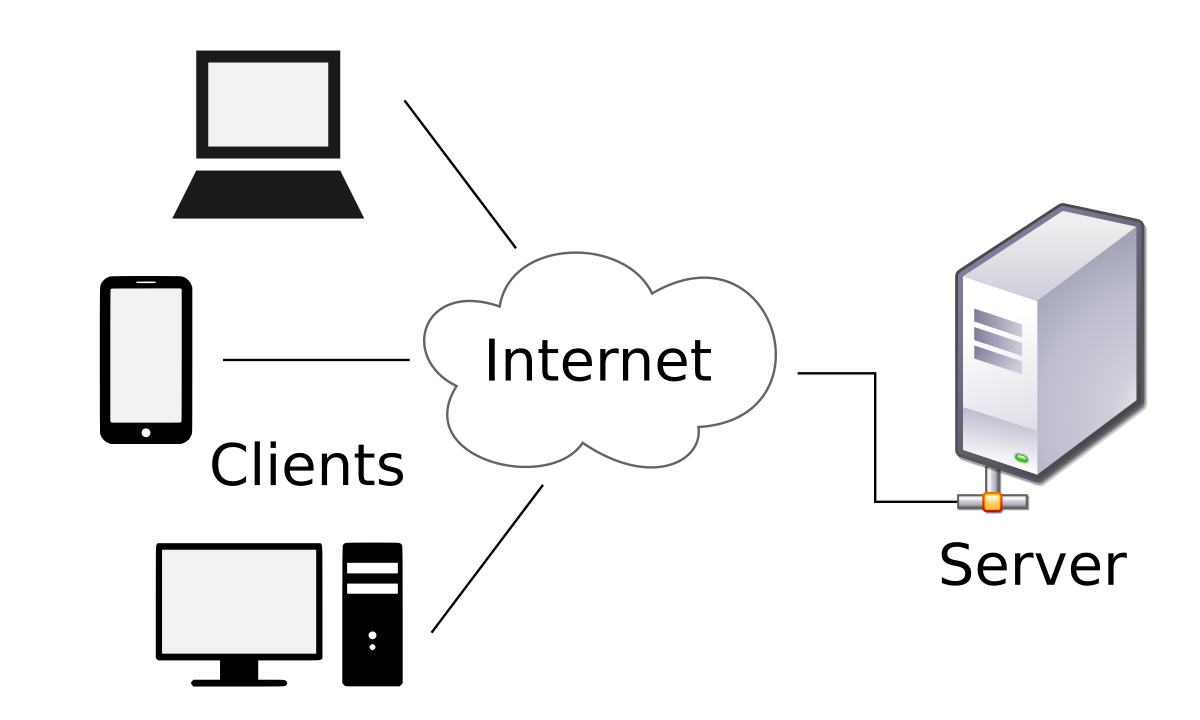

## Make a Request

Making a request with Requests is very simple.

In [3]:
r = requests.get('http://api.github.com/events')

In [4]:
type(r)

requests.models.Response

Now, we have a Response object called r. We can get all the information we need from this object. 

Requests' simple API means that all forms of HTTP request are as obvious

This is how you make an HTTP POST request

In [5]:
r = requests.post('https://httpbin.org/post', data={'key':'value'})

## Passing Parameters in URLs

You often want to send some sort of data in the URL’s query string. If you were constructing the URL by hand, this data would be given as key/value pairs in the URL after a question mark, e.g. httpbin.org/get?key=val. 

Requests allows you to provide these arguments as a dictionary of strings, using the params keyword argument

As an example, if you wanted to pass key1=value1 and key2=value2 to httpbin.org/get, you would use the following code:

In [6]:
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.get('https://httpbin.org/get', params = payload)

You can see that the URL has been correctly encoded by printing the URL

In [7]:
print(r.url)

https://httpbin.org/get?key1=value1&key2=value2


Note that any dictionary key whose value is None will not be added to the URL's query string

You can also pass a list of items as a value

In [8]:
payload = {'key1': 'value1', 'key2': ['value2', 'value3']}
r = requests.get('https://httpbin.org/get', params=payload)

In [9]:
print(r.url)

https://httpbin.org/get?key1=value1&key2=value2&key2=value3


## Response Content

We can read the content of the server’s response

In [10]:
import requests 
r = requests.get('https://api.github.com/events')

In [11]:
r.text

'[{"id":"12003016985","type":"PullRequestEvent","actor":{"id":546540,"login":"thanhson1085","display_login":"thanhson1085","gravatar_id":"","url":"https://api.github.com/users/thanhson1085","avatar_url":"https://avatars.githubusercontent.com/u/546540?"},"repo":{"id":221135660,"name":"tomochain/tomochain","url":"https://api.github.com/repos/tomochain/tomochain"},"payload":{"action":"closed","number":225,"pull_request":{"url":"https://api.github.com/repos/tomochain/tomochain/pulls/225","id":401294121,"node_id":"MDExOlB1bGxSZXF1ZXN0NDAxMjk0MTIx","html_url":"https://github.com/tomochain/tomochain/pull/225","diff_url":"https://github.com/tomochain/tomochain/pull/225.diff","patch_url":"https://github.com/tomochain/tomochain/pull/225.patch","issue_url":"https://api.github.com/repos/tomochain/tomochain/issues/225","number":225,"state":"closed","locked":false,"title":"Don\'t validate quantity of repayItems","user":{"login":"thanhnguyennguyen","id":17243442,"node_id":"MDQ6VXNlcjE3MjQzNDQy","avat

Requests will automatically decode content from the server. Most unicode charsets are seamlessly decoded.

When you make a request, Requests makes educated guesses about the encoding of the response based on the HTTP headers. The text encoding guessed by Requests is used when you access r.text.

You can find out what encoding Requests is using, and change it, using the r.encoding property:

In [12]:
r.encoding

'utf-8'

In [13]:
r.encoding = 'ISO-8859-1'
r.encoding

'ISO-8859-1'

## Binary Response Content

You can also access the response body as bytes, for non-text requests:

In [14]:
r.content

b'[{"id":"12003016985","type":"PullRequestEvent","actor":{"id":546540,"login":"thanhson1085","display_login":"thanhson1085","gravatar_id":"","url":"https://api.github.com/users/thanhson1085","avatar_url":"https://avatars.githubusercontent.com/u/546540?"},"repo":{"id":221135660,"name":"tomochain/tomochain","url":"https://api.github.com/repos/tomochain/tomochain"},"payload":{"action":"closed","number":225,"pull_request":{"url":"https://api.github.com/repos/tomochain/tomochain/pulls/225","id":401294121,"node_id":"MDExOlB1bGxSZXF1ZXN0NDAxMjk0MTIx","html_url":"https://github.com/tomochain/tomochain/pull/225","diff_url":"https://github.com/tomochain/tomochain/pull/225.diff","patch_url":"https://github.com/tomochain/tomochain/pull/225.patch","issue_url":"https://api.github.com/repos/tomochain/tomochain/issues/225","number":225,"state":"closed","locked":false,"title":"Don\'t validate quantity of repayItems","user":{"login":"thanhnguyennguyen","id":17243442,"node_id":"MDQ6VXNlcjE3MjQzNDQy","ava

## Custom Headers

If you’d like to add HTTP headers to a request, simply pass in a dict to the headers parameter.

In [15]:
url = 'https://api.github.com/some/endpoint'
headers = {'user-agent': 'my-app/0.0.1'}

In [16]:
r = requests.get(url, headers=headers)

## More complicated POST requests

Typically, you want to send some form-encoded data — much like an HTML form. To do this, simply pass a dictionary to the data argument. Your dictionary of data will automatically be form-encoded when the request is made

In [17]:
payload = {'key1': 'value1', 'key2': 'value2'}

In [18]:
r = requests.post("https://httpbin.org/post", data=payload)

In [19]:
print(r.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key1": "value1", 
    "key2": "value2"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "23", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5e8ee348-8cd6890aef6de9295f27da66"
  }, 
  "json": null, 
  "origin": "140.115.70.195", 
  "url": "https://httpbin.org/post"
}



The data argument can also have multiple values for each key. This can be done by making data either a list of tuples or a dictionary with lists as values. This is particularly useful when the form has multiple elements that use the same key

In [20]:
payload_tuples = [('key1', 'value1'), ('key1', 'value2')]
r1 = requests.post('https://httpbin.org/post', data=payload_tuples)

In [21]:
print(r1.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key1": [
      "value1", 
      "value2"
    ]
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "23", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5e8ee34b-996e78f7df937d350125d8c8"
  }, 
  "json": null, 
  "origin": "140.115.70.195", 
  "url": "https://httpbin.org/post"
}



In [22]:
payload_dict = {'key1': ['value1', 'value2']}
r2 = requests.post('https://httpbin.org/post', data=payload_dict)

In [23]:
print(r2.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key1": [
      "value1", 
      "value2"
    ]
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "23", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5e8ee34e-dd69afd86b0d97e858305f68"
  }, 
  "json": null, 
  "origin": "140.115.70.195", 
  "url": "https://httpbin.org/post"
}



## Response Status Codes

We can check the response status code

In [24]:
r = requests.get('https://httpbin.org/get')
r.status_code

200

Requests also comes with a built-in status code lookup object for easy reference

In [25]:
r.status_code == requests.codes.ok

True

If we made a bad request (a 4XX client error or 5XX server error response), we can raise it with Response.raise_for_status()

In [26]:
bad_r = requests.get('https://httpbin.org/status/404')
bad_r.status_code

404

In [27]:
bad_r.raise_for_status()

HTTPError: 404 Client Error: NOT FOUND for url: https://httpbin.org/status/404

But, since our status_code for r was 200, when we call raise_for_status( ) we get:

In [28]:
r.raise_for_status() # None

## Response Headers

We can view the server’s response headers using a Python dictionary:

The dictionary is special, though: it’s made just for HTTP headers. 

In [29]:
r.headers

{'Date': 'Thu, 09 Apr 2020 08:56:49 GMT', 'Content-Type': 'application/json', 'Content-Length': '308', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

## Cookies

To send your own cookies to the server, you can use the cookies parameter

In [30]:
url = 'https://httpbin.org/cookies'
cookies = dict(cookies_are='working')

In [31]:
r = requests.get(url, cookies=cookies)

In [32]:
r.text

'{\n  "cookies": {\n    "cookies_are": "working"\n  }\n}\n'

Cookies are returned in a RequestsCookieJar, which acts like a dict but also offers a more complete interface, suitable for use over multiple domains or paths. Cookie jars can also be passed in to requests:

In [33]:
jar = requests.cookies.RequestsCookieJar()
jar.set('tasty_cookie', 'yum', domain='httpbin.org', path='/cookies')
jar.set('gross_cookie', 'blech', domain='httpbin.org', path='/elsewhere')
url = 'https://httpbin.org/cookies'
r = requests.get(url, cookies=jar)
r.text

'{\n  "cookies": {\n    "tasty_cookie": "yum"\n  }\n}\n'

## Redirection and History 

By default Requests will perform location redirection for all verbs except HEAD.

We can use the history property of the Response object to track redirection.

The Response.history list contains the Response objects that were created in order to complete the request. The list is sorted from the oldest to the most recent response

In [34]:
r = requests.get('http://github.com/')

In [35]:
r.url

'https://github.com/'

In [36]:
r.status_code

200

In [37]:
r.history

[<Response [301]>]

You can disable redirection handling with the allow_redirects parameter:

In [38]:
r = requests.get('http://github.com/', allow_redirects=False)

In [39]:
r.status_code

301

In [40]:
r.history

[]

## Timeouts

You can tell Requests to stop waiting for a response after a given number of seconds with the timeout parameter. Nearly all production code should use this parameter in nearly all requests. Failure to do so can cause your program to hang indefinitely

In [41]:
requests.get('https://github.com/', timeout=1)

<Response [200]>

## Example 1 :  Yahoo! Shopping (Get Method)

In [42]:
from urllib.parse import quote
query = input("Please input search items：")
url = "https://tw.search.buy.yahoo.com/search/shopping/product?p=" + quote(query)
#https://tw.search.buy.yahoo.com/search/shopping/product?p=%E8%80%B3%E6%A9%9F
res = requests.get(url)
print(res.url)

Please input search items：耳機
https://tw.buy.yahoo.com/search/product?p=%E8%80%B3%E6%A9%9F


In [43]:
res.text

'<!DOCTYPE html><html><head><meta http-equiv="content-type" content="text/html; charset=utf-8"/><title>耳機|Yahoo奇摩購物中心</title><meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1.0,maximum-scale=1.0,user-scalable=no"/><meta name="application-name" content="Yahoo奇摩購物中心"/><meta name="description" content="在Yahoo奇摩購物中心找到4795筆耳機商品，其中包含了手機/相機/耳機/穿戴,電腦/電競/遊戲/週邊,家電/電視/冷氣/冰箱等類型的耳機商品，數十萬件商品，品質生活盡在雅虎購物"/><meta property="og:title" content="耳機|Yahoo奇摩購物中心"/><meta property="og:type" content="website"/><meta property="og:url" content="https://tw.buy.yahoo.com/search/product?kw=%E8%80%B3%E6%A9%9F&amp;p=%E8%80%B3%E6%A9%9F"/><meta property="og:description" content="在Yahoo奇摩購物中心找到4795筆耳機商品，其中包含了手機/相機/耳機/穿戴,電腦/電競/遊戲/週邊,家電/電視/冷氣/冰箱等類型的耳機商品，數十萬件商品，品質生活盡在雅虎購物"/><meta property="og:image" content="https://s.yimg.com/zp/MerchandiseImages/4C02C80BF3-SP-7567365.jpg"/><meta property="og:image:secure_url" content="https://s.yimg.com/zp/MerchandiseImages/4C02C80BF3-SP-7567365.jpg"/><meta

## Example 2: Taiwan High Speed Rail (Post Method)

In [44]:
import requests

url = 'http://m.thsrc.com.tw/tw/TimeTable/SearchResultList'

thsrc = {
    'startStation': 'fbd828d8-b1da-4b06-a3bd-680cdca4d2cd',
    'endStation': '977abb69-413a-4ccf-a109-0272c24fd490',
    'theDay': '2020/04/09',
    'timeSelect': '19:30',
    'waySelect': 'DepartureInMandarin'
}
res = requests.post(url, data = thsrc)

In [45]:
print(res.text) 



<!DOCTYPE html>
<html lang="zh-tw">
<head><meta charset="utf-8" /><title>
	台灣高鐵 Taiwan High Speed Rail
</title><meta name="keywords" content="高鐵,快速,旅遊假期,遊玩" /><meta name="description" content="台灣高鐵連結台灣南北主要城市，我們不只是交通運輸業，更是推動台灣­前進的服務業；我們代表的不僅只是速度，而是速度所帶來的現代生活新態度；我們以更文明的旅行體驗，成為你實現夢想的助力，台灣高鐵，實踐台灣新生活。" />
    <!-- Facebook -->
    <meta property="og:description" content="台灣高鐵連結台灣南北主要城市，我們不只是交通運輸業，更是推動台灣­前進的服務業；我們代表的不僅只是速度，而是速度所帶來的現代生活新態度；我們以更文明的旅行體驗，成為你實現夢想的助力，台灣高鐵，實踐台灣新生活。" /><meta property="og:image" content="http://www.thsrc.com.tw/Content/logo.jpg" />
    <!--Google +1 start-->
    <meta itemprop="name" content="台灣高鐵" /><meta itemprop="description" content="台灣高鐵連結台灣南北主要城市，我們不只是交通運輸業，更是推動台灣­前進的服務業；我們代表的不僅只是速度，而是速度所帶來的現代生活新態度；我們以更文明的旅行體驗，成為你實現夢想的助力，台灣高鐵，實踐台灣新生活。" /><meta itemprop="image" content="http://www.thsrc.com.tw/Content/logo.jpg" />
    <!-- ViewPort -->
    <meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=no, minimum-scale=1.0, maximum-scale=1

# BeautifulSoup 

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. 

Here’s an HTML document. It’s part of a story from Alice in Wonderland

In [46]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

Running the “three sisters” document through Beautiful Soup gives us a BeautifulSoup object, which represents the document as a nested data structure

In [47]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


Here are some simple ways to navigate that data structure

In [48]:
soup.title

<title>The Dormouse's story</title>

In [49]:
soup.title.name

'title'

In [50]:
soup.title.string

"The Dormouse's story"

In [51]:
soup.title.parent.name

'head'

In [52]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [53]:
soup.p['class']

['title']

In [54]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [55]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [56]:
soup.find(id="link3")

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

One common task is extracting all the URLs found within a page’s <a> tags

In [57]:
for link in soup.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


Another common task is extracting all the text from a page

In [58]:
print(soup.get_text())


The Dormouse's story

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



## Making the Soup

To parse a document, pass it into the BeautifulSoup constructor. You can pass in a string or an open filehandle

In [59]:
from bs4 import BeautifulSoup

#with open("index.html") as fp:
#    soup = BeautifulSoup(fp)

soup = BeautifulSoup("<html>data</html>")

Beautiful Soup then parses the document using the best available parser. It will use an HTML parser unless you specifically tell it to use an XML parser.

## Kinds of Objects 

Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

But you’ll only ever have to deal with about four kinds of objects: 
* Tag
* NavigableString
* BeautifulSoup
* Comment

### Tag

A Tag object corresponds to an XML or HTML tag in the original document

In [60]:
soup = BeautifulSoup('<b class="boldest">Extremely bold</b>')
tag = soup.b
type(tag)

bs4.element.Tag

The most important features of a tag are its name and attributes.

#### Name

Every tag has a name, accessible as .name

In [61]:
tag.name

'b'

If you change a tag’s name, the change will be reflected in any HTML markup generated by Beautiful Soup

In [62]:
tag.name = "blockquote"
tag

<blockquote class="boldest">Extremely bold</blockquote>

#### Attribute

A tag may have any number of attributes. You can access a tag’s attributes by treating the tag like a dictionary

In [63]:
soup = BeautifulSoup('<b id="boldest"></b>')
tag = soup.b

In [64]:
tag['id']

'boldest'

You can access that dictionary directly as .attrs

In [65]:
tag.attrs

{'id': 'boldest'}

You can add, remove, and modify a tag’s attributes. Again, this is done by treating the tag as a dictionary

In [66]:
tag['id'] = 'verybold'
tag['another-attribute'] = 1
tag

<b another-attribute="1" id="verybold"></b>

In [67]:
del tag['id']
del tag['another-attribute']
tag

<b></b>

In [68]:
tag['id']

KeyError: 'id'

In [69]:
print(tag.get('id'))

None


#### Multi-valued attributes

The most common multi-valued attribute is class (that is, a tag can have more than one CSS class). Others include rel, rev, accept-charset, headers, and accesskey.

Beautiful Soup presents the value(s) of a multi-valued attribute as a list

In [70]:
css_soup = BeautifulSoup('<p class="body"></p>')
css_soup.p['class']

['body']

In [71]:
css_soup = BeautifulSoup('<p class="body strikeout"></p>')
css_soup.p['class']

['body', 'strikeout']

If an attribute looks like it has more than one value, but it’s not a multi-valued attribute as defined by any version of the HTML standard, Beautiful Soup will leave the attribute alone

In [72]:
id_soup = BeautifulSoup('<p id="my id"></p>')
id_soup.p['id']

'my id'

When you turn a tag back into a string, multiple attribute values are consolidated

In [73]:
rel_soup = BeautifulSoup('<p>Back to the <a rel="index">homepage</a></p>')
rel_soup.a['rel']

['index']

In [74]:
rel_soup.a['rel'] = ['index', 'contents']

In [75]:
print(rel_soup.p)

<p>Back to the <a rel="index contents">homepage</a></p>


You can disable this by passing multi_valued_attributes=None as a keyword argument into the BeautifulSoup constructor

In [76]:
no_list_soup = BeautifulSoup('<p class="body strikeout"></p>', 'html', multi_valued_attributes=None)
no_list_soup.p['class']

'body strikeout'

You can use `get_attribute_list to get a value that’s always a list, whether or not it’s a multi-valued atribute

In [77]:
id_soup.p.get_attribute_list('id')

['my id']

If you parse a document as XML, there are no multi-valued attributes

In [78]:
xml_soup = BeautifulSoup('<p class="body strikeout"></p>', 'xml')
xml_soup.p['class']

'body strikeout'

Again, you can configure this using the multi_valued_attributes argument

In [79]:
class_is_multi= { '*' : 'class'}
xml_soup = BeautifulSoup('<p class="body strikeout"></p>', 'xml', multi_valued_attributes=class_is_multi)
xml_soup.p['class']

['body', 'strikeout']

You probably won’t need to do this, but if you do, use the defaults as a guide. They implement the rules described in the HTML specification

In [80]:
from bs4.builder import builder_registry
builder_registry.lookup('html').DEFAULT_CDATA_LIST_ATTRIBUTES

{'*': ['class', 'accesskey', 'dropzone'],
 'a': ['rel', 'rev'],
 'link': ['rel', 'rev'],
 'td': ['headers'],
 'th': ['headers'],
 'form': ['accept-charset'],
 'object': ['archive'],
 'area': ['rel'],
 'icon': ['sizes'],
 'iframe': ['sandbox'],
 'output': ['for']}

### NavigableString

A string corresponds to a bit of text within a tag. Beautiful Soup uses the NavigableString class to contain these bits of text

In [81]:
tag = BeautifulSoup('<b class="boldest">Extremely bold</b>')
tag.string

'Extremely bold'

In [82]:
type(tag.string)

bs4.element.NavigableString

A NavigableString is just like a Python Unicode string, except that it also supports some of the features described in Navigating the tree and Searching the tree. 

You can’t edit a string in place, but you can replace one string with another, using replace_with( )

In [83]:
tag.string.replace_with("No longer bold")
tag

<html><body><b class="boldest">No longer bold</b></body></html>

### BeautifulSoup

The BeautifulSoup object represents the parsed document as a whole. For most purposes, you can treat it as a Tag object. This means it supports most of the methods described in Navigating the tree and Searching the tree.

In [84]:
doc = BeautifulSoup("<document><content/>INSERT FOOTER HERE</document", "xml")
footer = BeautifulSoup("<footer>Here's the footer</footer>", "xml")
doc.find(text="INSERT FOOTER HERE").replace_with(footer)

'INSERT FOOTER HERE'

In [85]:
print(doc)

<?xml version="1.0" encoding="utf-8"?>
<document><content/><footer>Here's the footer</footer></document>


### Comments

Tag, NavigableString, and BeautifulSoup cover almost everything you’ll see in an HTML or XML file, but there are a few leftover bits. The main one you’ll probably encounter is the comment

In [86]:
markup = "<b><!--Hey, buddy. Want to buy a used parser?--></b>"
soup = BeautifulSoup(markup)
comment = soup.b.string

In [87]:
type(comment)

bs4.element.Comment

The Comment object is just a special type of NavigableString

In [88]:
comment

'Hey, buddy. Want to buy a used parser?'

But when it appears as part of an HTML document, a Comment is displayed with special formatting

In [89]:
print(soup.b.prettify())

<b>
 <!--Hey, buddy. Want to buy a used parser?-->
</b>


## Navigating the tree

Here’s the “Three sisters” HTML document again

In [90]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

### Going down

Tags may contain strings and other tags. These elements are the tag’s children. Beautiful Soup provides a lot of different attributes for navigating and iterating over a tag’s children.

Note that Beautiful Soup strings don’t support any of these attributes, because a string can’t have children.

#### Navigating using tag names

The simplest way to navigate the parse tree is to say the name of the tag you want.

In [91]:
soup.head

<head><title>The Dormouse's story</title></head>

In [92]:
soup.title

<title>The Dormouse's story</title>

You can do use this trick again and again to zoom in on a certain part of the parse tree. This code gets the first < b> tag beneath the < body> tag

In [93]:
soup.body.b

<b>The Dormouse's story</b>

Using a tag name as an attribute will give you only the first tag by that name

In [94]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

If you need to get all the < a> tags, or anything more complicated than the first tag with a certain name, you’ll need to use one of the methods described in Searching the tree, such as find_all( )

In [95]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

A tag’s children are available in a list called .contents

In [96]:
head_tag = soup.head
head_tag

<head><title>The Dormouse's story</title></head>

In [97]:
head_tag.contents

[<title>The Dormouse's story</title>]

In [98]:
title_tag = head_tag.contents[0]
title_tag

<title>The Dormouse's story</title>

In [99]:
title_tag.contents

["The Dormouse's story"]

The BeautifulSoup object itself has children. In this case, the < html> tag is the child of the BeautifulSoup object

In [100]:
len(soup.contents)

1

In [101]:
soup.contents[0].name

'html'

A string does not have .contents, because it can’t contain anything

In [102]:
text = title_tag.contents[0]
text.contents

AttributeError: 'NavigableString' object has no attribute 'contents'

Instead of getting them as a list, you can iterate over a tag’s children using the .children generator

In [103]:
for child in title_tag.children:
    print(child)

The Dormouse's story


The .contents and .children attributes only consider a tag’s direct children. For instance, the < head> tag has a single direct child–the < title> tag

In [104]:
head_tag.contents

[<title>The Dormouse's story</title>]

But the < title> tag itself has a child: the string “The Dormouse’s story”. There’s a sense in which that string is also a child of the < head> tag. The .descendants attribute lets you iterate over all of a tag’s children, recursively: its direct children, the children of its direct children, and so on

In [105]:
for child in head_tag.descendants:
    print(child)

<title>The Dormouse's story</title>
The Dormouse's story


The < head> tag has only one child, but it has two descendants: the < title> tag and the < title> tag’s child. The BeautifulSoup object only has one direct child (the < html> tag), but it has a whole lot of descendants

In [106]:
len(list(soup.children))

1

In [107]:
len(list(soup.descendants))

25

If a tag has only one child, and that child is a NavigableString, the child is made available as .string

In [108]:
title_tag.string

"The Dormouse's story"

If a tag’s only child is another tag, and that tag has a .string, then the parent tag is considered to have the same .string as its child

In [109]:
head_tag.contents

[<title>The Dormouse's story</title>]

In [110]:
head_tag.string

"The Dormouse's story"

If a tag contains more than one thing, then it’s not clear what .string should refer to, so .string is defined to be None

In [111]:
print(soup.html.string)

None


If there’s more than one thing inside a tag, you can still look at just the strings. Use the .strings generator

In [112]:
for string in soup.strings:
    print(repr(string))

"The Dormouse's story"
'\n'
'\n'
"The Dormouse's story"
'\n'
'Once upon a time there were three little sisters; and their names were\n'
'Elsie'
',\n'
'Lacie'
' and\n'
'Tillie'
';\nand they lived at the bottom of a well.'
'\n'
'...'


These strings tend to have a lot of extra whitespace, which you can remove by using the .stripped_strings generator instead

In [113]:
for string in soup.stripped_strings:
    print(repr(string))

"The Dormouse's story"
"The Dormouse's story"
'Once upon a time there were three little sisters; and their names were'
'Elsie'
','
'Lacie'
'and'
'Tillie'
';\nand they lived at the bottom of a well.'
'...'


### Going Up

Continuing the “family tree” analogy, every tag and every string has a parent: the tag that contains it

You can access an element’s parent with the .parent attribute. In the example “three sisters” document, the < head> tag is the parent of the < title> tag

In [114]:
title_tag = soup.title
title_tag

<title>The Dormouse's story</title>

In [115]:
title_tag.parent

<head><title>The Dormouse's story</title></head>

The title string itself has a parent: the < title> tag that contains it

In [116]:
title_tag.string.parent

<title>The Dormouse's story</title>

The parent of a top-level tag like <html> is the BeautifulSoup object itself

In [117]:
html_tag = soup.html
type(html_tag.parent)

bs4.BeautifulSoup

And the .parent of a BeautifulSoup object is defined as None

In [118]:
print(soup.parent)

None


You can iterate over all of an element’s parents with .parents. This example uses .parents to travel from an < a> tag buried deep within the document, to the very top of the document

In [119]:
link = soup.a
link

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [120]:
for parent in link.parents:
    if parent is None:
        print(parent)
    else:
        print(parent.name)

p
body
html
[document]


### Going sideways

Consider a simple document like this

In [121]:
sibling_soup = BeautifulSoup("<a><b>text1</b><c>text2</c></b></a>")
print(sibling_soup.prettify())

<html>
 <body>
  <a>
   <b>
    text1
   </b>
   <c>
    text2
   </c>
  </a>
 </body>
</html>


The < b> tag and the < c> tag are at the same level: they’re both direct children of the same tag. We call them siblings. When a document is pretty-printed, siblings show up at the same indentation level. You can also use this relationship in the code you write.

You can use .next_sibling and .previous_sibling to navigate between page elements that are on the same level of the parse tree

In [122]:
sibling_soup.b.next_sibling

<c>text2</c>

In [123]:
sibling_soup.c.previous_sibling

<b>text1</b>

The < b> tag has a .next_sibling, but no .previous_sibling, because there’s nothing before the < b> tag on the same level of the tree. For the same reason, the < c> tag has a .previous_sibling but no .next_sibling 

In [124]:
print(sibling_soup.b.previous_sibling)

None


In [125]:
print(sibling_soup.c.next_sibling)

None


The strings “text1” and “text2” are not siblings, because they don’t have the same parent

In [126]:
sibling_soup.b.string

'text1'

In [127]:
print(sibling_soup.b.string.next_sibling)

None


In real documents, the .next_sibling or .previous_sibling of a tag will usually be a string containing whitespace. Going back to the “three sisters” document

You might think that the .next_sibling of the first < a> tag would be the second < a> tag. But actually, it’s a string: the comma and newline that separate the first < a> tag from the second

In [128]:
link = soup.a
link

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [129]:
link.next_sibling

',\n'

The second < a> tag is actually the .next_sibling of the comma

In [130]:
link.next_sibling.next_sibling

<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>

You can iterate over a tag’s siblings with .next_siblings or .previous_siblings

In [131]:
for sibling in soup.a.next_siblings:
    print(repr(sibling))

',\n'
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
' and\n'
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
';\nand they lived at the bottom of a well.'


In [132]:
for sibling in soup.find(id="link3").previous_siblings:
    print(repr(sibling))

' and\n'
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
',\n'
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
'Once upon a time there were three little sisters; and their names were\n'


### Going back and forth

Take a look at the beginning of the “three sisters” document

An HTML parser takes this string of characters and turns it into a series of events: “open an < html> tag”, “open a < head> tag”, “open a < title> tag”, “add a string”, “close the < title> tag”, “open a < p> tag”, and so on. Beautiful Soup offers tools for reconstructing the initial parse of the document

The .next_element attribute of a string or tag points to whatever was parsed immediately afterwards. It might be the same as .next_sibling, but it’s usually drastically different.

Here’s the final < a> tag in the “three sisters” document. Its .next_sibling is a string: the conclusion of the sentence that was interrupted by the start of the < a> tag.

In [133]:
last_a_tag = soup.find("a", id="link3")
last_a_tag

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [134]:
last_a_tag.next_sibling

';\nand they lived at the bottom of a well.'

But the .next_element of that < a> tag, the thing that was parsed immediately after the < a> tag, is not the rest of that sentence: it’s the word “Tillie”

In [135]:
last_a_tag.next_element

'Tillie'

The .previous_element attribute is the exact opposite of .next_element. It points to whatever element was parsed immediately before this one

In [136]:
last_a_tag.previous_element

' and\n'

In [137]:
last_a_tag.previous_element.next_element

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

You can use these iterators to move forward or backward in the document as it was parsed

In [138]:
for element in last_a_tag.next_elements:
    print(repr(element))

'Tillie'
';\nand they lived at the bottom of a well.'
'\n'
<p class="story">...</p>
'...'


## Searching the tree

Beautiful Soup defines a lot of methods for searching the parse tree, but they’re all very similar. 

In [139]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

### Kinds of Filters

Before talking in detail about find_all( ) and similar methods, I want to show examples of different filters you can pass into these methods. These filters show up again and again, throughout the search API. You can use them to filter based on a tag’s name, on its attributes, on the text of a string, or on some combination of these.

#### A string

The simplest filter is a string. Pass a string to a search method and Beautiful Soup will perform a match against that exact string.

In [140]:
soup.find_all('b')

[<b>The Dormouse's story</b>]

#### A regular expression

If you pass in a regular expression object, Beautiful Soup will filter against that regular expression using its search( ) method.

In [141]:
import re
for tag in soup.find_all(re.compile("^b")):
    print(tag.name)

body
b


In [142]:
for tag in soup.find_all(re.compile("t")):
    print(tag.name)

html
title


#### A list 

If you pass in a list, Beautiful Soup will allow a string match against any item in that list. 

In [143]:
soup.find_all(["a", "b"])

[<b>The Dormouse's story</b>,
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

The value True matches everything it can 

In [144]:
for tag in soup.find_all(True):
    print(tag.name)

html
head
title
body
p
b
p
a
a
a
p


#### A function 

If none of the other matches work for you, define a function that takes an element as its only argument. The function should return True if the argument matches, and False otherwise.

In [145]:
def has_class_but_no_id(tag):
    return tag.has_attr('class') and not tag.has_attr('id')

In [146]:
soup.find_all(has_class_but_no_id)

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [147]:
def not_lacie(href):
    return href and not re.compile("lacie").search(href)
soup.find_all(href=not_lacie)

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [148]:
from bs4 import NavigableString
def surrounded_by_strings(tag):
    return (isinstance(tag.next_element, NavigableString)
            and isinstance(tag.previous_element, NavigableString))

for tag in soup.find_all(surrounded_by_strings):
    print(tag.name)

body
p
a
a
a
p


### find_all( )

The find_all( ) method looks through a tag’s descendants and retrieves all descendants that match your filters.

In [149]:
soup.find_all("title")

[<title>The Dormouse's story</title>]

In [150]:
soup.find_all("p", "title")

[<p class="title"><b>The Dormouse's story</b></p>]

In [151]:
soup.find_all("a")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [152]:
soup.find_all(id="link2")

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]

In [153]:
import re
soup.find(string=re.compile("sisters"))

'Once upon a time there were three little sisters; and their names were\n'

* What does it mean to pass in a value for string, or id? 
* Why does find_all("p", "title") find a < p> tag with the CSS class “title”? 

#### The name argument 

Pass in a value for name and you’ll tell Beautiful Soup to only consider tags with certain names

In [154]:
soup.find_all("title")

[<title>The Dormouse's story</title>]

#### The keyword arguments

Any argument that’s not recognized will be turned into a filter on one of a tag’s attributes.

In [155]:
soup.find_all(id='link2')

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]

In [156]:
soup.find_all(href=re.compile("elsie"))

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]

In [157]:
soup.find_all(id=True)

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [158]:
soup.find_all(href=re.compile("elsie"), id='link1')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]

#### The string argument

With string you can search for strings instead of tags

In [159]:
soup.find_all(string="Elsie")

['Elsie']

In [160]:
soup.find_all(string=["Tillie", "Elsie", "Lacie"])

['Elsie', 'Lacie', 'Tillie']

In [161]:
soup.find_all(string=re.compile("Dormouse"))

["The Dormouse's story", "The Dormouse's story"]

In [162]:
def is_the_only_string_within_a_tag(s):
    """Return True if this string is the only child of its parent tag."""
    return (s == s.parent.string)

In [163]:
soup.find_all(string=is_the_only_string_within_a_tag)

["The Dormouse's story",
 "The Dormouse's story",
 'Elsie',
 'Lacie',
 'Tillie',
 '...']